# 2026260

In [1]:
import numpy as np;
import math;
import random;
import matplotlib.pyplot as plot;

## Task 1 - Function Implementation 

In [2]:
# Function Counters

oF = 0;
sS = 0;
yS = 0;
bB = 0;
bL = 0;

In [3]:
def objectiveFunction(x):
    
    global oF;
    oF += 1;
    
    x1 = x[0];
    x2 = x[1];
    x3 = x[2];
    x4 = x[3];
    
    return (1.10471 * (x1 ** 2) * x2) + (0.04811 * x3 * x4 * (14.0 + x2));

In [4]:
def shearStress(x):
    
    global sS;
    sS += 1;
    
    x1 = x[0];
    x2 = x[1];
    x3 = x[2];
    x4 = x[3];
    
    fdTau = 6000 / (math.sqrt(2) * x1 * x2);
    
    sdTauDenominator = 2 * (0.707 * x1 * x2 * (((x2 ** 2) / 12) + (0.25 * ((x1 + x3) ** 2))));
    
    sdTau = (6000 * (14 + 0.5 * x2) * (math.sqrt(0.25 * ((x2 ** 2) + ((x1 + x3) ** 2))))) / (sdTauDenominator);
    
    tau = math.sqrt(((fdTau ** 2) + (sdTau ** 2)) + ((x2 * fdTau * sdTau) / (math.sqrt(0.25 * ((x2 ** 2) + ((x1 + x3) ** 2))))));
    
    return 13600 - tau;

In [5]:
def isAllowableYieldStress(x):
    
    global yS;
    yS += 1;
    
    x1 = x[0];
    x2 = x[1];
    x3 = x[2];
    x4 = x[3];
    
    sigma = 504000 / ((x3 ** 2) * x4);
    
    return 30000 - sigma;

In [6]:
def isBiggerBeamBreadth(x):
    
    global bB;
    bB += 1;
    
    x1 = x[0];
    x2 = x[1];
    x3 = x[2];
    x4 = x[3];
    
    return x4 - x1;

In [7]:
def isAllowableBucklingLoad(x):
    
    global bL;
    bL += 1;
    
    x1 = x[0];
    x2 = x[1];
    x3 = x[2];
    x4 = x[3];
    
    Pc = 64746.022 * (1 - 0.0282346 * x3) * x3 * (x4 ** 3);
    
    return Pc - 6000;

### Function Testing

In [8]:
x = np.array([1.05, 3.15, 4.43, 7.87]);

print("Objective function output: ", objectiveFunction(x));
print("First constraint function output: ", shearStress(x));
print("Second constraint function output: ", isAllowableYieldStress(x));
print("Third constraint function output: ", isBiggerBeamBreadth(x));
print("Fourth constraint function output: ", isAllowableBucklingLoad(x));

Objective function output:  32.6024179859
First constraint function output:  5308.848564674312
Second constraint function output:  26736.764990548952
Third constraint function output:  6.82
Fourth constraint function output:  122317448.61430933


### Function Counter Printing

In [17]:
print("Objective function is called: ", oF);
print("First constraint function is called: ", sS);
print("Second constraint function is called: ", yS);
print("Third constraint function is called: ", bB);
print("Fourth constraint function is called: ", bL);

Objective function is called:  326937
First constraint function is called:  440001
Second constraint function is called:  327625
Third constraint function is called:  284081
Fourth constraint function is called:  186325


### Boolean function for Constraint checking

In [10]:
def checkConstraints(x):
    if (shearStress(x) >= 0) and (isAllowableYieldStress(x) >= 0) and (isBiggerBeamBreadth(x) >= 0) and (isAllowableBucklingLoad(x) >= 0):
        return True;
    else:
        return False;

## Task 2 - Random Search

In [11]:
def random_search(function, max_iter, lower_bound, upper_bound):
    points_to_evaluate = np.random.uniform(low=lower_bound,high=upper_bound, size=(max_iter, len(lower_bound)));
    
    result = [];
    
    for point in points_to_evaluate:
        if(checkConstraints(point) == True):
            result.append(function(point));
        else:
            result.append(float('inf'));
            
    results = np.asarray(result);
    
    best_ind = np.argmin(results);
    
    return points_to_evaluate[best_ind], results[best_ind];

The best solution is:[0.36307782 4.23592514 7.43054969 0.42966084] => 3.42


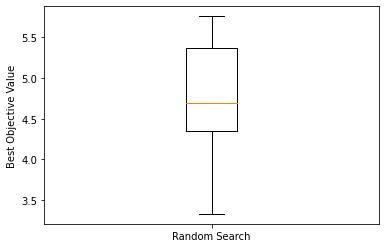

In [12]:
# Running Random Search
number_of_samples = 10000;
lower_bound = np.array([0.125, 0.125 , 0.1, 0.1]);
upper_bound = np.array([5, 5, 10,10]);

result_random_search = random_search(objectiveFunction, number_of_samples, lower_bound, upper_bound);

print("The best solution is:{} => {:.2f}".format(result_random_search[0], result_random_search[1]));

# Boxplot for Random Search
result_RS = [random_search(objectiveFunction, number_of_samples, lower_bound, upper_bound)[-1]
                               for i in range(21)];
plot.boxplot([result_RS]);
plot.xticks([1], ['Random Search']);
plot.ylabel("Best Objective Value");

## Task 3 - Simulated Annealing

In [13]:
def simulated_annealing(function, max_iter, lower_bound, upper_bound, temp):

    xbest = np.array(np.random.uniform(low=lower_bound, high=upper_bound, size=(4)));
    
    if(checkConstraints(xbest) == True):
        ybest = function(xbest);
    else:
        ybest = function(xbest) + 10 * np.max([0, np.max(xbest)]);
    
    xc = xbest;
    yc = ybest;
    
    for i in range(1, max_iter):
        
        xa = xc + 0.1 * np.random.normal(lower_bound, upper_bound);
        
        if(checkConstraints(xa) == True):
            ya = function(xa);
        else:
            ya = function(xa) + 10 * np.max([0, np.max(xa)]);
            
        delta_Y = ya - yc;
        
        t = temp / float(i);
        
        eq = np.exp(-delta_Y / t);
        
        if (delta_Y <= 0) or (random.uniform(0,1) < min(eq, 1)):
            xc = xa;
            yc = ya;
            
        if ya < ybest:
            xbest = xa;
            ybest = ya;
            
    return xbest, ybest;

The best solution is:[-0.27770216  6.33097257  7.94477352  0.27767802] => 2.70


C:\Users\SAMARTHYA\AppData\Local\Temp\ipykernel_7108\3599070979.py:26: RuntimeWarning: overflow encountered in exp
  eq = np.exp(-delta_Y / t);


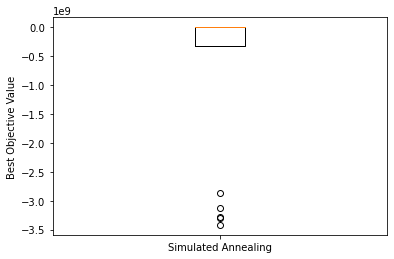

In [14]:
# Running Simulated Annealing
number_of_samples = 10000;
lower_bound = np.array([0.125, 0.125 , 0.1, 0.1]);
upper_bound = np.array([5, 5, 10, 10]);
temp = 100;

res_simulated_annealing = simulated_annealing(objectiveFunction, number_of_samples, lower_bound, upper_bound, temp)

print("The best solution is:{} => {:.2f}".format(res_simulated_annealing[0], res_simulated_annealing[1]));

# Boxplot for Simulated Annealing
result_SA = [simulated_annealing(objectiveFunction, number_of_samples, lower_bound, upper_bound, temp)[1]
            for i in range(21)]

plot.boxplot([result_SA]);
plot.xticks([1], ['Simulated Annealing']);
plot.ylabel("Best Objective Value");

## Task 4 - 21 Repetitions and Comparision

In [15]:
print(f'Random Search Results: {result_RS}\n')
print(f'Simulated Annealing Results: {result_SA}\n')

Random Search Results: [4.255236783890433, 5.116224172569827, 4.382150739031901, 4.553818696615684, 5.463473415433463, 4.149205691746924, 5.611960797069141, 4.048768102948157, 4.545676065048058, 4.469035734836243, 5.7570556970917055, 5.366568179766627, 5.148855462209073, 4.727531230194835, 5.552305662283425, 5.72811125811172, 3.6060041659346362, 5.256482107434375, 3.331881973816257, 4.687706403725084, 4.343763932121906]

Simulated Annealing Results: [2.518629775018519, -2861472081.2763066, 2.4392817125256436, 2.5410473175665285, -3297969767.806104, 2.8409048092205835, 2.6881555591839086, -3274371520.0801744, 2.669057868645947, 2.510785659373443, 2.4723328998627023, 2.5559587551951837, 2.89714569816239, -3418919902.764162, 2.4309953312037953, -321559556.4689823, -3121422400.9076777, 2.5677994234796144, 2.6874228826640416, 2.5863309871377176, 2.431229449886404]



Text(0, 0.5, 'Best Objective Value')

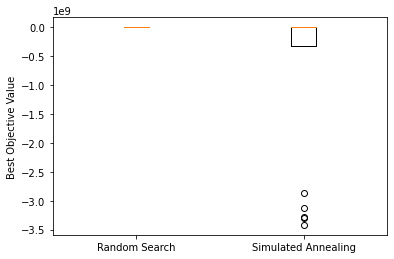

In [16]:
plot.boxplot([result_RS, result_SA])
plot.xticks([1,2], ['Random Search', 'Simulated Annealing'])
plot.ylabel("Best Objective Value")